In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

In [31]:
plt.style.use('ggplot')

## Creating Dataset

In [3]:
n_pts = 500
centers = [[-0.5,0.5],[0.5,-0.5]]
X,y = datasets.make_circles(n_samples=n_pts,noise=0.1,random_state=123,factor=0.2)

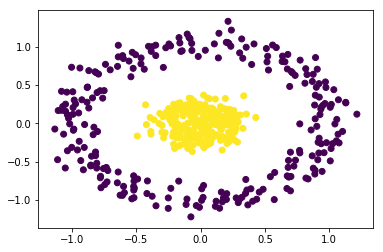

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

## Perceptron Model

In [7]:
class Model(nn.Module):
    
    def __init__(self,input_size,H1,output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,H1)
        self.linear2 = nn.Linear(H1,output_size)
        
    def forward(self,x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self,x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [9]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# Training

In [13]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [14]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred,y_data)
    print("epoch: ",i,",loss: ",loss.item())
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()  # calculate the gradient
    optimizer.step() # upgrade parameters

epoch:  0 ,loss:  0.032193753868341446
epoch:  1 ,loss:  0.030534055083990097
epoch:  2 ,loss:  0.029004152864217758
epoch:  3 ,loss:  0.02761271223425865
epoch:  4 ,loss:  0.026254357770085335
epoch:  5 ,loss:  0.024975841864943504
epoch:  6 ,loss:  0.023773755878210068
epoch:  7 ,loss:  0.022613534703850746
epoch:  8 ,loss:  0.02153046242892742
epoch:  9 ,loss:  0.020530076697468758
epoch:  10 ,loss:  0.01958545669913292
epoch:  11 ,loss:  0.018690431490540504
epoch:  12 ,loss:  0.017852820456027985
epoch:  13 ,loss:  0.017065491527318954
epoch:  14 ,loss:  0.016317863017320633
epoch:  15 ,loss:  0.015612924471497536
epoch:  16 ,loss:  0.014954444020986557
epoch:  17 ,loss:  0.014336589723825455
epoch:  18 ,loss:  0.01375311054289341
epoch:  19 ,loss:  0.013203555718064308
epoch:  20 ,loss:  0.012687656097114086
epoch:  21 ,loss:  0.012201150879263878
epoch:  22 ,loss:  0.011739907786250114
epoch:  23 ,loss:  0.011303501203656197
epoch:  24 ,loss:  0.010892658494412899
epoch:  25 ,lo

epoch:  200 ,loss:  0.0008419993682764471
epoch:  201 ,loss:  0.0008356008911505342
epoch:  202 ,loss:  0.0008292787824757397
epoch:  203 ,loss:  0.0008230372332036495
epoch:  204 ,loss:  0.0008168680942617357
epoch:  205 ,loss:  0.0008107760804705322
epoch:  206 ,loss:  0.0008047528681345284
epoch:  207 ,loss:  0.0007988080033101141
epoch:  208 ,loss:  0.0007929294370114803
epoch:  209 ,loss:  0.0007871201960369945
epoch:  210 ,loss:  0.0007813826086930931
epoch:  211 ,loss:  0.0007757125422358513
epoch:  212 ,loss:  0.00077010941458866
epoch:  213 ,loss:  0.0007645764271728694
epoch:  214 ,loss:  0.0007591080502606928
epoch:  215 ,loss:  0.0007537034689448774
epoch:  216 ,loss:  0.0007483651279471815
epoch:  217 ,loss:  0.0007430862169712782
epoch:  218 ,loss:  0.0007378689479082823
epoch:  219 ,loss:  0.0007327166968025267
epoch:  220 ,loss:  0.000727623759303242
epoch:  221 ,loss:  0.0007225883891806006
epoch:  222 ,loss:  0.0007176167564466596
epoch:  223 ,loss:  0.000712700595613

epoch:  394 ,loss:  0.0003084854979533702
epoch:  395 ,loss:  0.00030735426116734743
epoch:  396 ,loss:  0.0003062321920879185
epoch:  397 ,loss:  0.0003051141684409231
epoch:  398 ,loss:  0.0003040037117898464
epoch:  399 ,loss:  0.00030290326685644686
epoch:  400 ,loss:  0.0003018053248524666
epoch:  401 ,loss:  0.0003007152408827096
epoch:  402 ,loss:  0.00029963217093609273
epoch:  403 ,loss:  0.00029855690081603825
epoch:  404 ,loss:  0.00029748809174634516
epoch:  405 ,loss:  0.0002964238519780338
epoch:  406 ,loss:  0.0002953651419375092
epoch:  407 ,loss:  0.0002943149011116475
epoch:  408 ,loss:  0.0002932717325165868
epoch:  409 ,loss:  0.0002922315034084022
epoch:  410 ,loss:  0.0002912022464442998
epoch:  411 ,loss:  0.00029017357155680656
epoch:  412 ,loss:  0.00028915362781845033
epoch:  413 ,loss:  0.00028813874814659357
epoch:  414 ,loss:  0.0002871306787710637
epoch:  415 ,loss:  0.00028612944879569113
epoch:  416 ,loss:  0.0002851327299140394
epoch:  417 ,loss:  0.000

epoch:  586 ,loss:  0.00017237577412743121
epoch:  587 ,loss:  0.00017193354142364115
epoch:  588 ,loss:  0.00017149194900412112
epoch:  589 ,loss:  0.00017105077859014273
epoch:  590 ,loss:  0.00017061275138985366
epoch:  591 ,loss:  0.00017017532081808895
epoch:  592 ,loss:  0.00016973908350337297
epoch:  593 ,loss:  0.00016930463607423007
epoch:  594 ,loss:  0.00016887283709365875
epoch:  595 ,loss:  0.00016844214405864477
epoch:  596 ,loss:  0.0001680142740951851
epoch:  597 ,loss:  0.00016758924175519496
epoch:  598 ,loss:  0.00016716026584617794
epoch:  599 ,loss:  0.0001667374453973025
epoch:  600 ,loss:  0.0001663134025875479
epoch:  601 ,loss:  0.00016589272127021104
epoch:  602 ,loss:  0.00016547643463127315
epoch:  603 ,loss:  0.00016505441453773528
epoch:  604 ,loss:  0.00016463863721583039
epoch:  605 ,loss:  0.0001642257411731407
epoch:  606 ,loss:  0.00016381069144699723
epoch:  607 ,loss:  0.00016339703870471567
epoch:  608 ,loss:  0.0001629874313948676
epoch:  609 ,los

epoch:  777 ,loss:  0.0001091444501071237
epoch:  778 ,loss:  0.00010890466364799067
epoch:  779 ,loss:  0.00010866416414501145
epoch:  780 ,loss:  0.00010842545452760532
epoch:  781 ,loss:  0.00010818791633937508
epoch:  782 ,loss:  0.00010794896661536768
epoch:  783 ,loss:  0.0001077145425369963
epoch:  784 ,loss:  0.00010747883789008483
epoch:  785 ,loss:  0.00010724309686338529
epoch:  786 ,loss:  0.00010700953134801239
epoch:  787 ,loss:  0.00010677726095309481
epoch:  788 ,loss:  0.00010654547804733738
epoch:  789 ,loss:  0.00010631227632984519
epoch:  790 ,loss:  0.00010608357115415856
epoch:  791 ,loss:  0.00010585488780634478
epoch:  792 ,loss:  0.0001056225155480206
epoch:  793 ,loss:  0.000105394545244053
epoch:  794 ,loss:  0.00010516691691009328
epoch:  795 ,loss:  0.00010494084563106298
epoch:  796 ,loss:  0.00010471120185684413
epoch:  797 ,loss:  0.00010448846296640113
epoch:  798 ,loss:  0.00010426361404825002
epoch:  799 ,loss:  0.0001040381466737017
epoch:  800 ,loss

epoch:  971 ,loss:  7.257232209667563e-05
epoch:  972 ,loss:  7.243510481202975e-05
epoch:  973 ,loss:  7.229822949739173e-05
epoch:  974 ,loss:  7.215932419057935e-05
epoch:  975 ,loss:  7.202163396868855e-05
epoch:  976 ,loss:  7.18860756023787e-05
epoch:  977 ,loss:  7.175111386459321e-05
epoch:  978 ,loss:  7.161616667872295e-05
epoch:  979 ,loss:  7.148145232349634e-05
epoch:  980 ,loss:  7.134814950404689e-05
epoch:  981 ,loss:  7.12149849277921e-05
epoch:  982 ,loss:  7.10832464392297e-05
epoch:  983 ,loss:  7.095101318554953e-05
epoch:  984 ,loss:  7.08196239429526e-05
epoch:  985 ,loss:  7.068859122227877e-05
epoch:  986 ,loss:  7.056114554870874e-05
epoch:  987 ,loss:  7.042988727334887e-05
epoch:  988 ,loss:  7.03001715010032e-05
epoch:  989 ,loss:  7.0171408879105e-05
epoch:  990 ,loss:  7.004263898124918e-05
epoch:  991 ,loss:  6.991481495788321e-05
epoch:  992 ,loss:  6.97871291777119e-05
epoch:  993 ,loss:  6.965968350414187e-05
epoch:  994 ,loss:  6.953700358280912e-05


Text(0.5,0,'epoch')

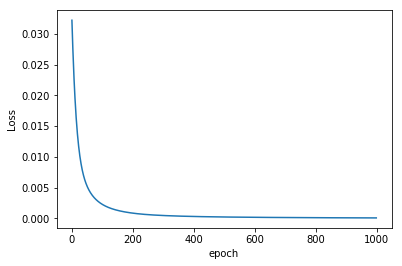

In [15]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

## Testing

In [19]:
?np.meshgrid

In [49]:
def plot_decision_boundary(X,y):
        x_span = np.linspace(min(X[:,0]-0.25),max(X[:,0]+0.25))
        y_span = np.linspace(min(X[:,1]-0.25),max(X[:,1])+0.25)
        xx,yy = np.meshgrid(x_span,y_span)
        # get a 50 * 50 grid covering all the data
        grid = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
        # make predictions on the grid point
        pred_func = model.forward(grid)
        z = pred_func.view(xx.shape).detach().numpy() # use detach to remove subgraph from gradient computation
        cs = plt.contourf(xx,yy,z,colors=['white','red'])  # z magnitude of probability
        cs.cmap.set_over('red')
        cs.cmap.set_under('blue')
        

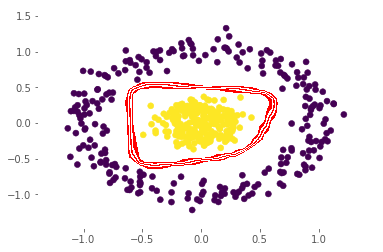

In [50]:
plot_decision_boundary(X,y)
plt.scatter(X[:,0],X[:,1],c=y)

Prediction is  1


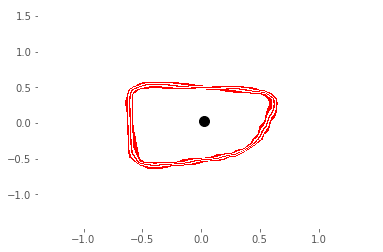

In [52]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color="black")
print("Prediction is ",prediction)
plot_decision_boundary(X,y)